In [213]:
%reload_ext autoreload

%autoreload 2

from model import *
import functools as ft
import matplotlib.pyplot as plt

In [214]:
latent_dim = 9
TAXICAB    = ft.partial(np.linalg.norm, axis=0, ord=1)
EUCLIDEAN  = ft.partial(np.linalg.norm, axis=0, ord=2)
norm       = ft.partial(np.linalg.norm, axis=0, ord=-2)


c = Config( net_size = 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = "tanh"
          , norm = norm
          )
m = build_model(c)

In [252]:
z = np.random.normal(0, 1, size=c.latent_dim)
print(f"z: {z}")

z: [-0.8702695  -0.6687775  -0.8307102  -0.51089517  0.44267823 -0.31268373
  0.88980235  0.02885429  1.15044352]


/home/noon/tools/miniconda3/envs/cppn-3d/lib/python3.6/site-packages/numpy/linalg/linalg.py:2294: RuntimeWarning: divide by zero encountered in power
  absx **= ord


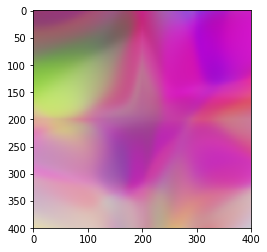

In [255]:
size = 400
width  = size
height = size

yys = forward(c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))

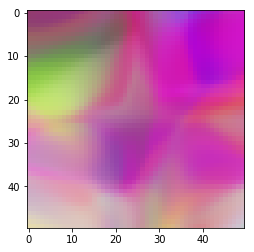

In [260]:
size = 50
width  = size
height = size

yys = forward(c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))

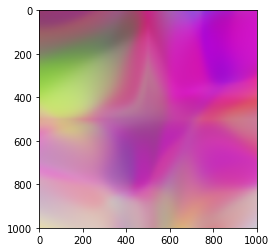

In [261]:
size = 1000
width  = size
height = size

yys = forward(c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))